[Column definitions](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)

In [149]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

table = ascii.read('q1_q17_dr25_koi.csv')
table.add_index('kepler_name')

planets = table[table['koi_disposition'] != 'FALSE POSITIVE']

(array([ 618.,   27.,    7.,    5.,    1.,    1.,    0.,    0.,    0.,    1.]),
 array([  3.41842017e-01,   1.07430920e+02,   2.14519998e+02,
          3.21609077e+02,   4.28698155e+02,   5.35787233e+02,
          6.42876311e+02,   7.49965389e+02,   8.57054468e+02,
          9.64143546e+02,   1.07123262e+03]),
 <a list of 10 Patch objects>)

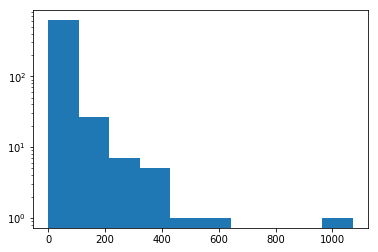

In [150]:
plt.hist(planets['koi_period'], log=True)

In [151]:
from astropy.constants import R_jup, R_sun, R_earth

If you had to guess on what orbital periods planets might tidally influence stars, what do you think is the longest orbital period worth looking at? 10 d?

With 10 d, you get 8 KOIs with CKS Keck/HIRES spectra, with 5 d, you get ~1.

In [152]:
len(ideal_koi_list), len(np.unique(ideal_koi_list))

(576, 408)

N planets 616


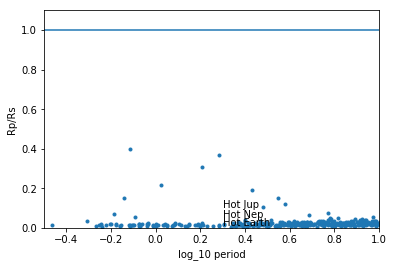

In [162]:
log_per = np.log10(planets['koi_period'].data.data)
rprs = np.sqrt(planets['koi_depth'].data.data * 1e-6)

max_per = 100
max_rprs = 1.0

within_bin = (planets['koi_period'].data.data < max_per) & (rprs < max_rprs)
print("N planets", np.count_nonzero(within_bin))
ideal_koi_list = [i.split('.')[0] for i in planets[within_bin]['kepoi_name'].data.data]

fig, ax = plt.subplots()
ax.plot(log_per, rprs, '.')
ax.set(xlabel='log_10 period', ylabel='Rp/Rs')
ax.set_ylim([0, 1.1*max_rprs])
ax.set_xlim([-0.5, np.log10(10)])
ax.text(np.log10(2), R_jup/R_sun, 'Hot Jup')
ax.text(np.log10(2), 0.05, 'Hot Nep')
ax.text(np.log10(2), R_earth/R_sun, 'Hot Earth')
ax.axvline(np.log10(max_per))
ax.axhline(max_rprs)
plt.show()

In [163]:
print(np.sqrt(planets.loc['Kepler-3 b']['koi_depth'] * 1e-6))
print(planets.loc['Kepler-3 b']['koi_period'])

0.0656947486486
4.887803076


In [164]:
planets[within_bin][planets[within_bin]['koi_kepmag'] < 13]

rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
int64,int64,str9,str13,str14,str14,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2986,9718066,K02287.01,Kepler-378 b,CONFIRMED,CANDIDATE,0.199,0,0,0,0,16.09227518,6.165e-05,-6.165e-05,142.51659,0.00331,-0.00331,0.932,0.027,-0.654,2.1072,0.095,-0.095,128.5,8.0,-8.0,0.98,0.09,-0.02,503.0,--,--,15.15,4.04,-1.88,18.1,1,q1_q17_dr25_tce,4657.0,93.0,-93.0,4.641,0.012,-0.048,0.67,0.055,-0.017,294.94858,46.438641,12.485
2987,9718066,K02287.02,Kepler-378 c,CONFIRMED,CANDIDATE,0.08,0,0,0,0,28.9060526,0.000233,-0.000233,158.82431,0.00613,-0.00613,0.863,0.027,-0.591,3.099,0.198,-0.198,99.0,8.3,-8.3,0.79,0.06,-0.02,414.0,--,--,6.94,1.86,-0.86,13.3,2,q1_q17_dr25_tce,4657.0,93.0,-93.0,4.641,0.012,-0.048,0.67,0.055,-0.017,294.94858,46.438641,12.485
3,10748390,K00003.01,Kepler-3 b,CONFIRMED,CANDIDATE,0.913,0,0,0,0,4.887803076,4.66e-07,-4.66e-07,124.8130808,7.51e-05,-7.51e-05,0.054,0.145,-0.054,2.36255,0.00466,-0.00466,4315.8,6.1,-6.1,4.82,0.17,-0.18,800.0,--,--,96.67,14.91,-13.89,862.3,1,q1_q17_dr25_tce,4778.0,86.0,-95.0,4.591,0.015,-0.036,0.763,0.028,-0.028,297.70935,48.080853,9.174
89,10318874,K00104.01,Kepler-94 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,2.508057497,3.78e-07,-3.78e-07,135.000657,0.000124,-0.000124,0.742,0.047,-0.143,1.1134,0.0167,-0.0167,1507.6,6.2,-6.2,3.25,0.16,-0.12,997.0,--,--,234.06,45.09,-33.11,312.7,1,q1_q17_dr25_tce,4780.0,95.0,-95.0,4.597,0.015,-0.051,0.761,0.038,-0.027,281.19473,47.497131,12.895
379,6063220,K00305.01,Kepler-99 b,CONFIRMED,CANDIDATE,1.0,0,0,0,0,4.603575293,4.668e-06,-4.668e-06,171.840124,0.000813,-0.000813,0.246,0.189,-0.246,2.3499,0.0261,-0.0261,440.4,6.3,-6.3,1.51,0.08,-0.06,810.0,--,--,101.65,20.2,-15.28,79.7,1,q1_q17_dr25_tce,4783.0,95.0,-95.0,4.602,0.014,-0.046,0.741,0.039,-0.03,297.354,41.300049,12.97
2133,4276716,K01619.01,--,CANDIDATE,CANDIDATE,1.0,0,0,0,0,20.6654374,0.0001785,-0.0001785,132.01229,0.00651,-0.00651,0.05,0.417,-0.05,3.172,0.21,-0.21,100.4,8.4,-8.4,0.66,0.03,-0.04,487.0,--,--,13.35,2.41,-2.34,13.6,1,q1_q17_dr25_tce,4830.0,96.0,-96.0,4.605,0.042,-0.021,0.676,0.03,-0.037,294.99023,39.346378,11.759
2842,11774991,K02173.01,Kepler-367 b,CONFIRMED,CANDIDATE,0.999,0,0,0,0,37.8154157,0.0002667,-0.0002667,141.10346,0.00568,-0.00568,0.533,0.399,-0.316,4.662,0.162,-0.162,286.4,14.2,-14.2,1.21,0.08,-0.04,401.0,--,--,6.09,1.38,-0.91,22.4,1,q1_q17_dr25_tce,4856.0,86.0,-106.0,4.624,0.012,-0.048,0.705,0.049,-0.025,297.29242,49.981628,12.879
2843,11774991,K02173.02,Kepler-367 c,CONFIRMED,FALSE POSITIVE,0.0,0,0,1,0,53.5783052,0.0004684,-0.0004684,171.1857,0.00744,-0.00744,0.769,0.013,-0.556,5.194,0.2,-0.2,224.9,15.8,-15.8,1.16,0.09,-0.04,357.0,--,--,3.82,0.87,-0.56,15.4,2,q1_q17_dr25_tce,4856.0,86.0,-106.0,4.624,0.012,-0.048,0.705,0.049,-0.025,297.29242,49.981628,12.879
1330,1026957,K00958.01,--,CANDIDATE,CANDIDATE,1.0,0,0,0,0,21.76129812,1.727e-05,-1.727e-05,166.540438,0.000641,-0.000641,0.123,0.288,-0.123,1.243,0.026,-0.026,1300.7,26.8,-26.8,2.53,0.16,-0.1,486.0,--,--,13.18,3.0,-1.98,60.0,1,q1_q17_dr25_tce,4859.0,97.0,-97.0,4.612,0.015,-0.045,0.72,0.047,-0.029,291.25449,36.74361,1

In [165]:
n = 15
mag_order = np.argsort(planets[within_bin]['koi_kepmag'].data.data)
print(planets[within_bin]['kepoi_name'].data.data[mag_order][:n])
print(planets[within_bin]['koi_kepmag'].data.data[mag_order][:n])
print(planets[within_bin]['kepler_name'].data.data[mag_order][:n])

['K03158.01' 'K03158.02' 'K03158.03' 'K03158.04' 'K03158.05' 'K00003.01'
 'K00082.04' 'K00082.01' 'K00082.02' 'K00082.03' 'K00082.05' 'K00082.06'
 'K01619.01' 'K02050.02' 'K01781.03']
[  8.717   8.717   8.717   8.717   8.717   9.174  11.492  11.492  11.492
  11.492  11.492  11.492  11.759  12.218  12.231]
['Kepler-444 b' 'Kepler-444 c' 'Kepler-444 d' 'Kepler-444 e' 'Kepler-444 f'
 'Kepler-3 b' 'Kepler-102 c' 'Kepler-102 e' 'Kepler-102 d' 'Kepler-102 f'
 'Kepler-102 b' '0' '0' '0' '0']


In [166]:
from itertools import chain
splits = list(chain(*[i.split(".fits") for i in 
              open('/Users/bmmorris/git/cks_spots/spectra.html').read().split('href="')]))
cks_koi_list = np.unique([i.split('cks-')[1].split('_')[0].upper() for i in splits if i.startswith('cks')])
intersection = set(cks_koi_list).intersection(set(ideal_koi_list))
len(intersection)

130

In [167]:
# for i in intersection:
#     for j in table['kepoi_name']:
#         table['kepoi_name']

In [168]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(open('/Users/bmmorris/git/cks_spots/spectra.html').read(), 'html.parser')

links = []
teffs = []
root_url = 'http://www.astro.caltech.edu/~howard/cks/spectra/'
all_as = soup.find_all('a')

for link in all_as:
    if len(str(link)) > len('<a href="/~howard/cks/">Parent Directory</a>,'):
        koi_name = link.get('href').split('-')[1].split('_')[0]
        if 'bj' in link.get('href') and koi_name.upper() in intersection:
            links.append(root_url + link.get('href'))

In [169]:
with open('links_cached.txt', 'w') as w:
    w.write('\n'.join(links))

In [170]:
from astropy.utils.data import download_file

for link in links:
    download_file(link, cache=True)